<a href="https://colab.research.google.com/github/VictorFreir/IndustriALL-Project/blob/main/IndustriALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Hey there!</h1>
<h3>Sinta-se em seu próprio repositório, sirva seu café e vamos ao código.</h3>
<p>Nesse repositório, nós iremos resolver o case passado no processo seletivo da empresa IndustriALL. Nesse case, o grande desafio é a descoberta do resultado de alguns candidatos no antigo processo seletivo da empresa. Para mais detalhamento do case, acesse o arquivo: descrição_base.txt</p>


# Introdução


<p>Ao decorrer do projeto, nós iremos interagindo e eu te explicarei minha linha de raciocínio para a resolução dos problemas. Antes de começar o projeto em si, vamos esclarecer alguns pontos que precisaremos percorrer:</p>

<ul>
<li>Realizar a limpeza dos dados.</li>
<li>Descobrir e entender o(s) critério(s) de avaliação.</li>
<li>Identificar as variáveis que influenciam na aprovação.</li>
<li>Realizar o pré-processamento dos dados.</li>
<li>Aplicar um modelo de Machine Learning.</li>
<li>Prever os aprovados e reprovados no processo seletivo.</li>
</ul>

<p>Para começar, vamos importar as bibliotecas e base de dados necessárias:</p>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score

In [ ]:
df_candidatos = pd.read_csv("database_candidatos.csv",encoding="utf-8", header = 1)
df_notas_candidatos = pd.read_csv("notas_candidatos.csv",encoding="utf-8",)

print("Frame database_candidatos.csv")
display(df_candidatos.head(3))

print('\n\n')
print("Frame de notas_candidatos.csv")
display(df_notas_candidatos.head(3))

Frame database_candidatos.csv


,id_candidato,nome,idade,grande_vitoria,trab_presencial,horas_estagio,turno_estagio,ingles_leitura,ingles_escrita,ingles_conversa,ingles_vivencia_ext,titulacao,curso,primeira_graduacao,previsao_formacao,progresso_curso,estagio_DS,IC,TCC,tool_python,tool_R,tool_MATLAB,tool_sql,tool_dw,tool_BD,tool_cloud,tool_scala,tool_spark,tool_net,tool_rapidminer,tool_kubernets,tool_docker,tool_ssas,tool_tensorflow,tool_keras,tool_c++,tool_C#,tool_pytorch,tool_sklearn,tool_git,tool_pbi,tool_tableau,tool_qlick,tool_plotly,algoritmo_aprend_super,algoritmo_aprend_nao_super,algoritmo_aprend_refor,algoritmo_aprend_profun,algoritmo_modelagem_preditiva,algoritmo_modelavem_multivariada,algoritmo_visao_computacional,algoritmo_pdi,algoritmo_pds,algoritmo_busca_inteligente,algoritmo_otimizacao,algoritmo_sist_sugestao,algoritmo_robotica
0,0,Arya Stark,26,True,True,30h,full,F,F,F,6meses,graduacao,A,True,2021/2,2/3,1,Concluido,Fazendo,Tenho_domínio,Tenho_domínio,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Só_estudei_nunca_apliquei,Apliquei_em_algum_trabalho,Apliquei_em_algum_trabalho,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei
1,1,Asha Greyjoy,24,True,True,30h,full,F,A,A,6meses,graduacao,A,True,>2022/2,2/3,1,Não,Fazendo,Tenho_domínio,Já_ouvi_Falar,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_trabalhei,Já_ouvi_Falar,Já_trabalhei,Nunca_nem_vi,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_trabalhei,Desenvolvi_grandes_projetos_com_isso,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei
2,2,Balon Greyjoy,23,True,True,30h,restrito,B,B,B,0meses,graduacao,C,True,2020/2,2/3,0,Não,Não,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei





Frame de notas_candidatos.csv


,id_candidato,nome,nota_trabalho,nota_ingles,nota_profissional,nota_ferramentas,nota_algoritmos,nota_Final,aprovado
0,0,Arya Stark,?,?,?,?,?,?,?
1,1,Asha Greyjoy,1.0,0.9,0.9,0.7113207547169812,0.5887850467289719,0.8200211602891905,True
2,2,Balon Greyjoy,0.875,0.45,0.725,0.5000000000000001,0.09999999999999999,0.53,False


# Limpeza dos dados

Agora, nós vamos realizar a limpeza dos nossos dados. Para começar, note que algumas colunas estão preenchidas com um sinal de interrogação (?). Isso nos indica que é um dos candidatos que teremos que prever a aprovação. Então indetificaremos os indexes dessas linhas:

In [ ]:
indexes_faltantes = df_notas_candidatos[df_notas_candidatos.loc[:,'aprovado']=='?'].index
df_notas_candidatos.iloc[indexes_faltantes]

,id_candidato,nome,nota_trabalho,nota_ingles,nota_profissional,nota_ferramentas,nota_algoritmos,nota_Final,aprovado
0,0,Arya Stark,?,?,?,?,?,?,?
4,4,Brienne de Tarth,?,?,?,?,?,?,?
9,9,Daenerys Targaryen,?,?,?,?,?,?,?
26,26,Melisandre,?,?,?,?,?,?,?
46,46,Tyrion Lannister,?,?,?,?,?,?,?
48,48,Varys,?,?,?,?,?,?,?


Assim, para analisar os dados e futuramente enviarmos ao modelo, nós iremos separar os dados não-faltantes em um outro DataFrame:

In [ ]:
df_notas_candidatos_sem_nulos = df_notas_candidatos.loc[df_notas_candidatos['aprovado']!= '?'] # Separa as notas dos candidatos não nulos
indexes_sem_nulos = df_notas_candidatos.loc[df_notas_candidatos['aprovado']!= '?'].index # Guarda os indexes dos candidatos não nulos
df_candidatos_sem_nulos = df_candidatos.iloc[indexes_sem_nulos,:] # Separa os candidatos não nulos 
df_notas_candidatos_sem_nulos.head(2)


,id_candidato,nome,nota_trabalho,nota_ingles,nota_profissional,nota_ferramentas,nota_algoritmos,nota_Final,aprovado
1,1,Asha Greyjoy,1.0,0.9,0.9,0.7113207547169812,0.5887850467289719,0.8200211602891905,True
2,2,Balon Greyjoy,0.875,0.45,0.725,0.5000000000000001,0.09999999999999999,0.53,False


Agora, temos dois novos DataFrames sem os candidatos faltantes. Por experiência própria, antes de partirmos para as análises de dados, é interessante que convertamos as colunas quantitativas para "float", pois elas possivelmente estão em tipo "object":

In [ ]:
indexes = [2,3,4,5,6,7]
for i in indexes:
  df_notas_candidatos_sem_nulos.iloc[:,i] = df_notas_candidatos_sem_nulos.iloc[:,i].astype('float32')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<p>Agora, que tal darmos uma olhada se existem valores faltantes do tipo NaN?</p>

In [ ]:
display(df_notas_candidatos_sem_nulos.isnull().sum())
display(df_candidatos_sem_nulos.isnull().sum())

id_candidato         0
nome                 0
nota_trabalho        0
nota_ingles          0
nota_profissional    0
nota_ferramentas     0
nota_algoritmos      0
nota_Final           0
aprovado             0
dtype: int64

id_candidato                        0
nome                                0
idade                               0
grande_vitoria                      0
trab_presencial                     0
horas_estagio                       0
turno_estagio                       0
ingles_leitura                      0
ingles_escrita                      0
ingles_conversa                     0
ingles_vivencia_ext                 0
titulacao                           0
curso                               0
primeira_graduacao                  0
previsao_formacao                   0
progresso_curso                     0
estagio_DS                          0
IC                                  0
TCC                                 0
tool_python                         0
tool_R                              0
tool_MATLAB                         0
tool_sql                            0
tool_dw                             0
tool_BD                             0
tool_cloud                          0
tool_scala  

<p>Ótimo, nesse sentido, nossas bases de dados são bem limpas e então poderemos seguir para a próxima fase, a análise desses dados.</p>

# Entendendo os critérios avaliativos

<p>"Victor, como assim entender os critérios avaliativos?". Bem, nós ainda não temos a reposta de "por quê o candidato X passou e o Y não?". Vamos dar uma olhada na base de dados das notas para relembrarmos nossas variáveis: </p>

In [ ]:
df_notas_candidatos_sem_nulos.head(3)

,id_candidato,nome,nota_trabalho,nota_ingles,nota_profissional,nota_ferramentas,nota_algoritmos,nota_Final,aprovado
1,1,Asha Greyjoy,1.000,0.90,0.900,0.711321,0.588785,0.820021,True
2,2,Balon Greyjoy,0.875,0.45,0.725,0.500000,0.100000,0.530000,False
3,3,Bran Stark,1.000,0.90,0.900,0.889308,0.728972,0.883656,True


<p>Vamos começar avaliando a nota final:</p>

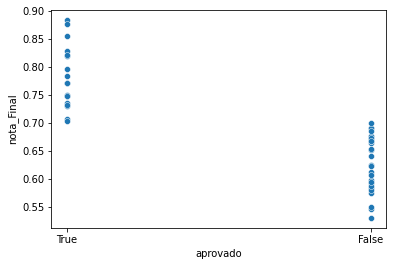

In [ ]:
sns.scatterplot(data=df_notas_candidatos_sem_nulos, x="aprovado", y="nota_Final")

<p>OPA! Vemos aqui que, como você já devia ter imaginado, a nota total é um valor decisório na aprovação do candidato. Iremos, apenas, visualizar de forma númerica: </p>

In [ ]:
print('Máximo')
display(df_notas_candidatos_sem_nulos.groupby('aprovado').nota_Final.max())
print('Mínimo')
display(df_notas_candidatos_sem_nulos.groupby('aprovado').nota_Final.min())

Máximo


aprovado
False    0.699340
True     0.883656
Name: nota_Final, dtype: float32

Mínimo


aprovado
False    0.530000
True     0.703701
Name: nota_Final, dtype: float32

<p>Olha, agora, nós temos a certeza que a nota é o valor que decide a aprovação, pois o aprovado de menor nota foi de 0,7 e o reprovado de maior nota foi de 0,6. "Okay, Victor, a nota é o valor decretório, mas será se algumas notas tem peso maior que outras?". Ótima pergunta! E é, extremamente, importante de ser avaliado. Segue: </p>

In [ ]:
for i in range(5): 
  print(f"Linha {i+1} media = {df_notas_candidatos_sem_nulos.iloc[i,2:7].values.mean()}")

Linha 1 media = 0.8200211524963379
Linha 2 media = 0.5300000309944153
Linha 3 media = 0.8836560249328613
Linha 4 media = 0.5750313997268677
Linha 5 media = 0.6405770182609558


<p>Bem, nas linhas acima, nós calculamos as médias das notas e elas totalizaram na nota notal. Ou seja, todas as notas tem peso igual no cálculo da nota total. "Victor, mas será se tiveram mais aprovados ou reprovados?". Boa, vamos dar uma olhada: </p>

In [ ]:
false,true = df_notas_candidatos_sem_nulos.groupby('aprovado').aprovado.count()
print(f'Cerca de {round(true*100/(true+false),2)}% dos participantes(não nulos) foram aprovados')

Cerca de 39.13% dos participantes(não nulos) foram aprovados


<p>Dessa forma, vemos que quase 40% foram aprovados. Então, se você tivesse que chutar, ao acaso, se um candidato seria ou não aprovado, você deveria apostar que ele não seria aprovado.</p>

Resumindo, nessa etapa, nós entendemos que a nota total é a variável que decide a aprovação, que ela é calculada pela média das outras notas e que apenas 40% dos candidatos são aprovados.

# Entendendo as variáveis que influenciam na aprovação

<p>Para começar, é importante salientar que, após as etapas anteriores, eu obtive o insight que prever as 5 notas faltantes - para calcular a nota total e verificar se o candidato será aprovado - era inviável. Uma vez que eu criaria 5 modelos, cada um para prever sua respectiva nota. Dessa forma, as chances de erro cresceriam. Por exemplo, se cada um de nossos modelos atingissem incríveis 95% de acurácia, as chances dele acertar todas as notas e consequentemente a nota total seria: (95/100)**5 = 77/100</p>
<p>Assim, nós vemos que os meus 5 ótimos modelos unidos teriam 77% de acurácia. Dessa maneira, nós vemos que a acurácia vai cair muito. No entanto, atingir 5 vezes uma acurácia de 95% é seria MUITO difícil de acontecer. Então, a nossa precisão cairia ainda mais. Para solucionar esse empasse, eu decidi apenas tentar prever se o candidato será ou não aprovado sem saber as notas dele, mas sim as habilidades e características dele. Tendo isso em mente, vamos entender quais variáveis influenciam nessa aprovação. Para isso, vamos começar criando um novo DataFrame com as características do candidato e o status de aprovação:</p>


In [ ]:
df_candidatos_sem_nulos_com_nota = df_candidatos_sem_nulos.copy()
df_candidatos_sem_nulos_com_nota = df_candidatos_sem_nulos_com_nota.assign(aprovado = df_notas_candidatos_sem_nulos['aprovado'])
df_candidatos_sem_nulos_com_nota.head(2)

,id_candidato,nome,idade,grande_vitoria,trab_presencial,horas_estagio,turno_estagio,ingles_leitura,ingles_escrita,ingles_conversa,ingles_vivencia_ext,titulacao,curso,primeira_graduacao,previsao_formacao,progresso_curso,estagio_DS,IC,TCC,tool_python,tool_R,tool_MATLAB,tool_sql,tool_dw,tool_BD,tool_cloud,tool_scala,tool_spark,tool_net,tool_rapidminer,tool_kubernets,tool_docker,tool_ssas,tool_tensorflow,tool_keras,tool_c++,tool_C#,tool_pytorch,tool_sklearn,tool_git,tool_pbi,tool_tableau,tool_qlick,tool_plotly,algoritmo_aprend_super,algoritmo_aprend_nao_super,algoritmo_aprend_refor,algoritmo_aprend_profun,algoritmo_modelagem_preditiva,algoritmo_modelavem_multivariada,algoritmo_visao_computacional,algoritmo_pdi,algoritmo_pds,algoritmo_busca_inteligente,algoritmo_otimizacao,algoritmo_sist_sugestao,algoritmo_robotica,aprovado
1,1,Asha Greyjoy,24,True,True,30h,full,F,A,A,6meses,graduacao,A,True,>2022/2,2/3,1,Não,Fazendo,Tenho_domínio,Já_ouvi_Falar,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_trabalhei,Já_ouvi_Falar,Já_trabalhei,Nunca_nem_vi,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_trabalhei,Desenvolvi_grandes_projetos_com_isso,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,True
2,2,Balon Greyjoy,23,True,True,30h,restrito,B,B,B,0meses,graduacao,C,True,2020/2,2/3,0,Não,Não,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,False


<p>Agora vamos dar uma conferida na relação de algumas variáveis com as aprovações:</p>

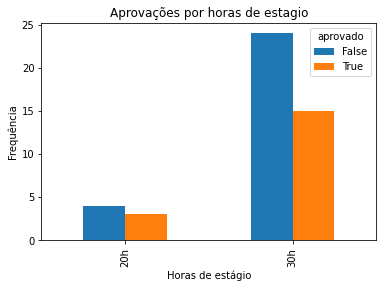

In [ ]:
x = df_candidatos_sem_nulos_com_nota['horas_estagio']
y = df_candidatos_sem_nulos_com_nota['aprovado']
pd.crosstab(index=x, columns=y).plot(kind='bar',title='Aprovações por horas de estagio', xlabel = 'Horas de estágio',ylabel='Frequência')

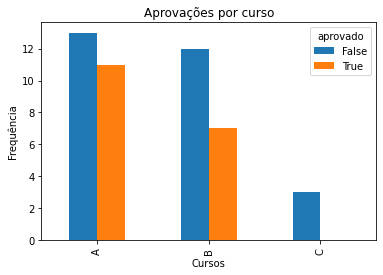

In [ ]:
x = df_candidatos_sem_nulos_com_nota['curso']
y = df_candidatos_sem_nulos_com_nota['aprovado']
pd.crosstab(index=x, columns=y).plot(kind='bar',title='Aprovações por curso', xlabel = 'Cursos',ylabel='Frequência')

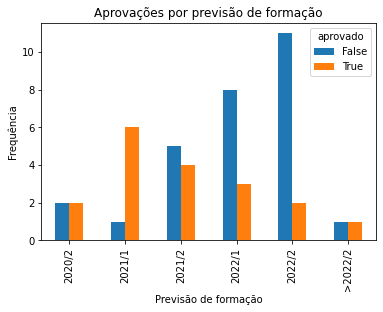

In [ ]:
x = df_candidatos_sem_nulos_com_nota['previsao_formacao']
y = df_candidatos_sem_nulos_com_nota['aprovado']
pd.crosstab(index=x, columns=y).plot(kind='bar',title='Aprovações por previsão de formação', xlabel = 'Previsão de formação',ylabel='Frequência')

<p>Acima, nós vemos que cada valor, independente da coluna, tem aprovações diferentes dos outros valores. Ou seja, uma pessoa que irá se formar no período 2021/1 tem diferentes probabilidades de aprovação de alguém que irá se formar no 2022/2, por exemplo.</p>

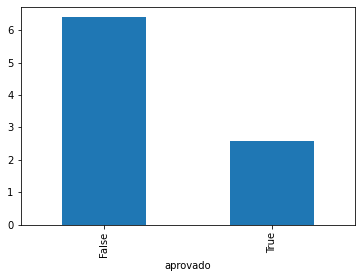

In [ ]:
display(df_candidatos_sem_nulos_com_nota.groupby('aprovado').idade.std().plot(kind='bar'))

<p>Acima, nós calculamos o desvio padrão da idade dos aprovados e reprovados. "Victor, não entendi o motivo". Relaxa, vou te explicar agora. Como o desvio padrão das idades dos aprovados é relativamente baixo, nós podemos dizer que, geralmente, os aprovados tem suas idades em um curto intervalo.</p>

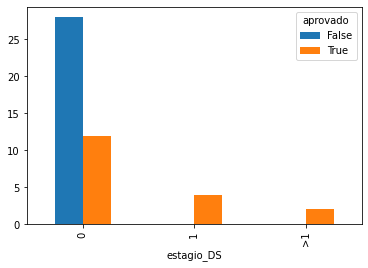

In [ ]:
x = df_candidatos_sem_nulos_com_nota['estagio_DS']
y = df_candidatos_sem_nulos_com_nota['aprovado']
pd.crosstab(index=x, columns=y).plot(kind='bar')

<p>"Olha, Victor, pessoas que já fizeram estágios não conseguem ser aprovados". Calma lá, jovem, realmente pode haver essa premissa na empresa. Contudo, nós, como analistas, não podemos afirmar isso sem saber da empresa. Dessa forma, mesmo que ninguém que já esteve em um estágio foi aprovado, o nosso modelo não deve considerar isso um fator que impossibilita a aprovação. </p>

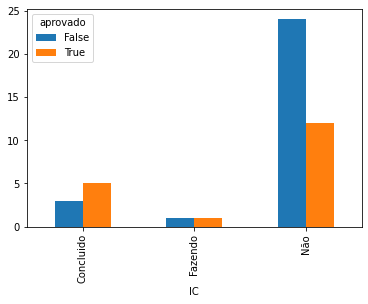

In [ ]:
x = df_candidatos_sem_nulos_com_nota['IC']
y = df_candidatos_sem_nulos_com_nota['aprovado']
pd.crosstab(index=x, columns=y).plot(kind='bar')

<p>Vemos que, na situação da Iniciação Científica, temos a mesma quantidade de pessoas aprovadas e reprovadas que estavam fazendo-o. "Victor, então nosso modelo vai chutar se vai ser aprovado ou não?". Não, em casos como esse, nosso modelo dará mais importância aos outros fatores.</p>
<p>Resumindo, nós vamos utilizar, além das habilidades dos candidatos, as suas características para, assim, prever se o candidato será ou não aprovado.</p>

# Pré-processamento dos dados


<p>Antes de tudo, nós precisamos lembrar que um modelo de Machine Learning "esconde" um modelo matemático e, em um modelo matemático, nós não podemos colocar como entrada uma palavra, então nós transformaremos os valores preditores e o valor de aprovação em números. </p>

In [ ]:
df_candidatos_sem_nulos_com_nota.head(2)

,id_candidato,nome,idade,grande_vitoria,trab_presencial,horas_estagio,turno_estagio,ingles_leitura,ingles_escrita,ingles_conversa,ingles_vivencia_ext,titulacao,curso,primeira_graduacao,previsao_formacao,progresso_curso,estagio_DS,IC,TCC,tool_python,tool_R,tool_MATLAB,tool_sql,tool_dw,tool_BD,tool_cloud,tool_scala,tool_spark,tool_net,tool_rapidminer,tool_kubernets,tool_docker,tool_ssas,tool_tensorflow,tool_keras,tool_c++,tool_C#,tool_pytorch,tool_sklearn,tool_git,tool_pbi,tool_tableau,tool_qlick,tool_plotly,algoritmo_aprend_super,algoritmo_aprend_nao_super,algoritmo_aprend_refor,algoritmo_aprend_profun,algoritmo_modelagem_preditiva,algoritmo_modelavem_multivariada,algoritmo_visao_computacional,algoritmo_pdi,algoritmo_pds,algoritmo_busca_inteligente,algoritmo_otimizacao,algoritmo_sist_sugestao,algoritmo_robotica,aprovado
1,1,Asha Greyjoy,24,True,True,30h,full,F,A,A,6meses,graduacao,A,True,>2022/2,2/3,1,Não,Fazendo,Tenho_domínio,Já_ouvi_Falar,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_trabalhei,Já_ouvi_Falar,Já_trabalhei,Nunca_nem_vi,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_trabalhei,Desenvolvi_grandes_projetos_com_isso,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,True
2,2,Balon Greyjoy,23,True,True,30h,restrito,B,B,B,0meses,graduacao,C,True,2020/2,2/3,0,Não,Não,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,False


In [ ]:
x_predict = df_candidatos_sem_nulos_com_nota.iloc[:,2:57]
y_predict = df_candidatos_sem_nulos_com_nota.iloc[:,-1]

In [ ]:
def true_or_false(row):
  if row == 'True':
    return 1
  else:
    return 0
y_predict = [y_predict.apply(true_or_false)]

In [ ]:
label_encoder = LabelEncoder()
for i in range(0,55):
  x_predict.iloc[:,i] = label_encoder.fit_transform(x_predict.iloc[:,i]) 
x_predict.head(2)

,idade,grande_vitoria,trab_presencial,horas_estagio,turno_estagio,ingles_leitura,ingles_escrita,ingles_conversa,ingles_vivencia_ext,titulacao,curso,primeira_graduacao,previsao_formacao,progresso_curso,estagio_DS,IC,TCC,tool_python,tool_R,tool_MATLAB,tool_sql,tool_dw,tool_BD,tool_cloud,tool_scala,tool_spark,tool_net,tool_rapidminer,tool_kubernets,tool_docker,tool_ssas,tool_tensorflow,tool_keras,tool_c++,tool_C#,tool_pytorch,tool_sklearn,tool_git,tool_pbi,tool_tableau,tool_qlick,tool_plotly,algoritmo_aprend_super,algoritmo_aprend_nao_super,algoritmo_aprend_refor,algoritmo_aprend_profun,algoritmo_modelagem_preditiva,algoritmo_modelavem_multivariada,algoritmo_visao_computacional,algoritmo_pdi,algoritmo_pds,algoritmo_busca_inteligente,algoritmo_otimizacao,algoritmo_sist_sugestao,algoritmo_robotica
1,5,1,1,1,0,2,0,0,2,0,0,1,5,2,1,2,1,3,0,1,1,0,0,3,0,0,0,1,0,1,2,0,3,0,0,0,3,3,0,0,0,1,1,3,1,1,1,1,0,3,2,1,2,2,2
2,4,1,1,1,1,1,1,1,0,0,2,1,0,2,0,2,2,0,2,2,0,2,0,0,2,2,2,2,1,2,2,2,2,0,0,2,2,2,0,0,1,2,2,2,1,2,2,2,2,2,1,1,1,2,2


<p>Bem, como já sabemos, o modelo realizará operações matemáticas. Por isso, nós temos que colocar esses valores na mesma escala, a fim de que valores como a idade - que númericamente são maiores que valores do curso, por exemplo - tenham maiores pesos.</p>

In [ ]:
standard = StandardScaler()
x_predict = standard.fit_transform(x_predict)
y_predict = np.array(y_predict)
y_predict =y_predict.reshape(y_predict.shape[1:])

Por ultimo, nós apenas vamos separar alguns dados para treinamento e outros para teste, a fim de obter uma ideia de acurácia do nosso modelo:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_predict,y_predict,test_size=0.2, random_state=1)

# Modelo de Machine Learning

Agora que os dados já foram convertidos para números, nós podemos, finalmente, criar e treinar o nosso modelo de Machine Learning. A técnica usada será a Naive Bayes, uma vez que é uma excelente técnica de classificação para base de dados pequenas, que, felizmente é o nosso caso. Segue o código da criação e treinamento:

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

Tendo o nosso modelo treinado, nós podemos, agora, verificar com os dados testes o quanto, aproximadamente, ele está acertando:

In [ ]:
prediction = naive_bayes.predict(X_test)
accuracy_score(y_test,prediction)

0.7

<p>Vemos, então, que nosso modelo acertou cerca de 70% das vezes.</p>

Feito isso, nós poderemos tentar prever os valores dos candidatos faltantes e, assim, "solucionar o caso".

# Prevendo as aprovações

Primeiro, nós precisaremos separar e pré-processar os dados dos candidatos faltantes - da mesma forma que fizemos com os candidatos previsores:

In [ ]:
df_candidatos_faltantes = df_candidatos.iloc[indexes_faltantes]
df_candidatos_faltantes = df_candidatos_faltantes.iloc[:,2:]
df_candidatos_faltantes.head()

,idade,grande_vitoria,trab_presencial,horas_estagio,turno_estagio,ingles_leitura,ingles_escrita,ingles_conversa,ingles_vivencia_ext,titulacao,curso,primeira_graduacao,previsao_formacao,progresso_curso,estagio_DS,IC,TCC,tool_python,tool_R,tool_MATLAB,tool_sql,tool_dw,tool_BD,tool_cloud,tool_scala,tool_spark,tool_net,tool_rapidminer,tool_kubernets,tool_docker,tool_ssas,tool_tensorflow,tool_keras,tool_c++,tool_C#,tool_pytorch,tool_sklearn,tool_git,tool_pbi,tool_tableau,tool_qlick,tool_plotly,algoritmo_aprend_super,algoritmo_aprend_nao_super,algoritmo_aprend_refor,algoritmo_aprend_profun,algoritmo_modelagem_preditiva,algoritmo_modelavem_multivariada,algoritmo_visao_computacional,algoritmo_pdi,algoritmo_pds,algoritmo_busca_inteligente,algoritmo_otimizacao,algoritmo_sist_sugestao,algoritmo_robotica
0,26,True,True,30h,full,F,F,F,6meses,graduacao,A,True,2021/2,2/3,1,Concluido,Fazendo,Tenho_domínio,Tenho_domínio,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Tenho_domínio,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Desenvolvi_grandes_projetos_com_isso,Desenvolvi_grandes_projetos_com_isso,Só_estudei_nunca_apliquei,Apliquei_em_algum_trabalho,Apliquei_em_algum_trabalho,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei
4,24,True,True,30h,full,I,I,I,0meses,graduacao,A,True,2021/2,2/3,>1,Fazendo,Não,Já_trabalhei,Já_trabalhei,Tenho_domínio,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Tenho_domínio,Tenho_domínio,Já_trabalhei,Já_ouvi_Falar,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei
9,30,True,True,30h,full,B,B,B,0meses,graduacao,C,False,2022/2,0/3,0,Não,Não,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Já_trabalhei,Já_ouvi_Falar,Já_ouvi_Falar,Já_ouvi_Falar,Nunca_nem_vi,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei
26,23,True,True,30h,full,I,B,B,0meses,graduacao,A,True,2020/2,2/3,1,Não,Fazendo,Já_trabalhei,Já_ouvi_Falar,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_trabalhei,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Já_trabalhei,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Já_trabalhei,Já_trabalhei,Já_ouvi_Falar,Nunca_nem_vi,Nunca_nem_vi,Nunca_nem_vi,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Só_estudei_nunca_apliquei,Apliquei_em_algum_trabalho,Apliquei_em_algum_trabalho,Só_estudei_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei,Nunca_estudei_e_nunca_apliquei
46,25,True,True,30h,full,B,B,B,0meses,graduaca

In [ ]:
label_encoder = LabelEncoder()
for i in range(55):
  df_candidatos_faltantes.iloc[:,i] = label_encoder.fit_transform(df_candidatos_faltantes.iloc[:,i]) 
df_candidatos_faltantes = standard.fit_transform(df_candidatos_faltantes)


<p>Com os dados já tratados, nós poderemos, enfim, tentar prever a aprovação dos candidatos faltantes</p>

In [ ]:
prediction = naive_bayes.predict(df_candidatos_faltantes)

In [ ]:
prediction

array([1, 1, 1, 1, 1, 1])

Segundo nosso modelo, todos os 6 candidatos tem mais probabilidade de serem aprovados que reprovados. "Victor, será se o modelo não está apenas classificando todas as pessoas como aprovado?". Boa questão, podemos conferir as possíveis respostas da seguinte forma:

In [ ]:
naive_bayes.classes_

array([0, 1])

<p>Vemos que o nosso modelo pode retornar tanto a aprovação quanto a reprovação.</p>

In [ ]:
naive_bayes.class_prior_

array([0.63888889, 0.36111111])

Acima, nós vemos que, selecionando ao acaso, tem-se 63% de chances de obter um candidato reprovado. No entanto, para o nosso modelo, os 6 candidatos tem mais chances de serem aprovados.

# Conclusão

<p>Chegando, infelizmente, no fim do nosso projeto, nós vamos dar uma breve recapitulada no que fizemos - que não foi pouco viu.</p>
<p>Ao decorrer desse notebook, nós entendemos o problema, elaboramos um plano lógico para solucionar-lo, fizemos a limpeza e tratamento dos dados, realizamos uma efetiva análise exploratória dos dados, criamos, treinamos e aplicamos um modelo de Machine Learning e quantificamos os seus resultados.</p>
<p>Portanto, eu espero que você tenha queimado uns fosfatos e secando sua caneca aqui comigo. Agradeço, imensamente, por ter chegado até o final. Se gostou do meu trabalho, convido-o a acompanhar mais de perto a minha jornada pelo LinkedIn ou GitHub. </p>